In [37]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\amazon_sales_data\Myntra Fasion Clothing.csv')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11480\4155894035.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\amazon_sales_data\Myntra Fasion Clothing.csv')


,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [39]:
df.describe()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews
count,5.265640e+05,333406.000000,526564.000000,190412.000000,190412.000000
mean,1.506939e+07,1237.444401,2414.068615,4.094892,61.990820
std,3.225710e+06,1052.063517,1916.962914,0.494158,125.714537
min,2.739900e+04,127.000000,99.000000,1.000000,0.000000
25%,1.388053e+07,659.000000,1299.000000,3.900000,8.000000
50%,1.597106e+07,952.000000,1999.000000,4.200000,18.000000
75%,1.734741e+07,1469.000000,2899.000000,4.400000,52.000000
max,1.846435e+07,27996.000000,90000.000000,5.000000,999.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [41]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [42]:
#finding missing values 
df['DiscountPrice (in Rs)'] = df['DiscountPrice (in Rs)'].fillna(df['DiscountPrice (in Rs)'].mean())
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].mean())
df.isnull().sum()

URL                          0
Product_id                   0
BrandName                    0
Category                     0
Individual_category          0
category_by_Gender           0
Description                  0
DiscountPrice (in Rs)        0
OriginalPrice (in Rs)        0
DiscountOffer            74306
SizeOption                   0
Ratings                      0
Reviews                      0
dtype: int64

In [43]:
#dropping missing value in discount offer column
df.drop('DiscountOffer' , axis=1, inplace=True)
df.isnull().sum()

URL                      0
Product_id               0
BrandName                0
Category                 0
Individual_category      0
category_by_Gender       0
Description              0
DiscountPrice (in Rs)    0
OriginalPrice (in Rs)    0
SizeOption               0
Ratings                  0
Reviews                  0
dtype: int64

In [44]:
#intialize list to store categorical and numerical column names 
categorical_col = []
numeerical_col = []
#iterate through each columns in the dataframe 
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_col.append(col)
    else:
        numeerical_col.append(col)

#print the list of categorical and numerical column names 
print("categorical columns : ")
print(categorical_col)
print("\n numerical columns : ")
print(numeerical_col)

categorical columns : 
['URL', 'BrandName', 'Category', 'Individual_category', 'category_by_Gender', 'Description', 'SizeOption']

 numerical columns : 
['Product_id', 'DiscountPrice (in Rs)', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews']


In [45]:
categorical_col

['URL',
 'BrandName',
 'Category',
 'Individual_category',
 'category_by_Gender',
 'Description',
 'SizeOption']

In [46]:
numeerical_col

['Product_id',
 'DiscountPrice (in Rs)',
 'OriginalPrice (in Rs)',
 'Ratings',
 'Reviews']

In [47]:
df['BrandName'].value_counts()

BrandName
Pothys                   16005
Roadster                 10935
KALINI                    9589
HERE&NOW                  6515
HRX by Hrithik Roshan     5297
                         ...  
PIVOTO                       1
PEONY SMART WORLD            1
OFFIRA TEX WORLD             1
Sztori Garfield              1
Geonaute By Decathlon        1
Name: count, Length: 2088, dtype: int64

In [48]:
df['Category'].value_counts()

Category
Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: count, dtype: int64

In [49]:
df['Individual_category'].value_counts()

Individual_category
tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
hair-accessory        1
lungi                 1
bracelet              1
flip-flops            1
Name: count, Length: 92, dtype: int64

In [50]:
df['Ratings'].value_counts()

Ratings
4.094892    336152
4.300000     22529
4.200000     20573
4.400000     18339
4.100000     17278
4.000000     17203
4.500000     13295
3.900000     11358
3.800000     11034
4.600000      9668
3.700000      7042
4.700000      5823
3.600000      5546
4.800000      4938
3.500000      4135
3.400000      3382
5.000000      3235
3.300000      2983
3.000000      2523
3.200000      1810
4.900000      1570
3.100000      1053
2.800000       940
2.900000       569
2.700000       557
2.500000       533
2.600000       467
2.000000       441
2.300000       405
1.000000       341
2.400000       259
2.200000       154
1.500000       101
1.800000        92
1.700000        65
2.100000        54
1.600000        39
1.300000        35
1.900000        23
1.400000        11
1.200000         7
1.100000         2
Name: count, dtype: int64

In [51]:
df['Reviews'].value_counts()

Reviews
61.99082     336152
5.00000       12173
6.00000        9876
7.00000        8326
8.00000        7346
              ...  
960.00000         1
992.00000         1
994.00000         1
821.00000         1
997.00000         1
Name: count, Length: 1001, dtype: int64

In [52]:
df['SizeOption'].value_counts()

SizeOption
S, M, L, XL, XXL          84643
Onesize                   77031
S, M, L, XL               53543
XS, S, M, L, XL           43875
XS, S, M, L, XL, XXL      37899
                          ...  
39, 40, 44, 46, 50            1
L, XL, XXL, M                 1
M, L, XL, 3XL, 4XL            1
32, 34, 40                    1
26, 27, 28, 29, 30, 32        1
Name: count, Length: 3588, dtype: int64

In [53]:
df.head(10)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.000000,1499.0,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.000000,1149.0,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.000000,1399.0,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.000000,1295.0,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,1237.444401,599.0,"XS, S, M, L, XL",4.2,999.0
5,https://www.myntra.com/tops/mast--harbour/mast...,2490950,Mast & Harbour,Western,tops,Women,mast harbour women yellow solid tank top,1237.444401,599.0,"XS, S, M, L, XL",4.4,999.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.000000,1499.0,"30, 32, 34, 36",3.9,998.0
7,https://www.myntra.com/tops/mayra/mayra-pink-e...,8439415,Mayra,Western,tops,Women,mayra pink embroidered a line pure cotton top,1237.444401,1395.0,"S, M, L, XL",3.7,998.0
8,https://www.myntra.com/tshirts/roadster/roadst...,17381394,Roadster,Western,tshirts,Women,roadster women pack of 2 solid t shirts,1237.444401,1098.0,"XS, S, M, L, XL",4.3,997.0
9,https://www.myntra.com/jeans/herenow/herenow-m...,2359257,HERE&NOW,Bottom Wear,jeans,Men,herenow men blue slim fit mid rise clean look ...,1237.444401,2749.0,"28, 30, 32, 34, 36",3.5,996.0


<Axes: xlabel='category_by_Gender'>

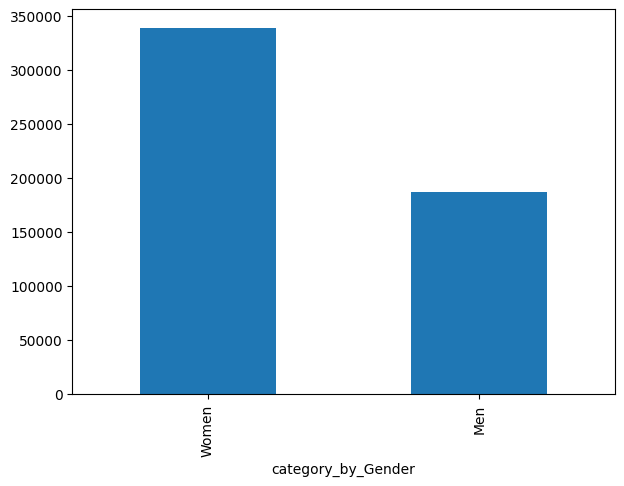

In [54]:
df['category_by_Gender'].value_counts().plot(kind='bar', stacked= True, figsize=(7,5))

<function matplotlib.pyplot.show(close=None, block=None)>

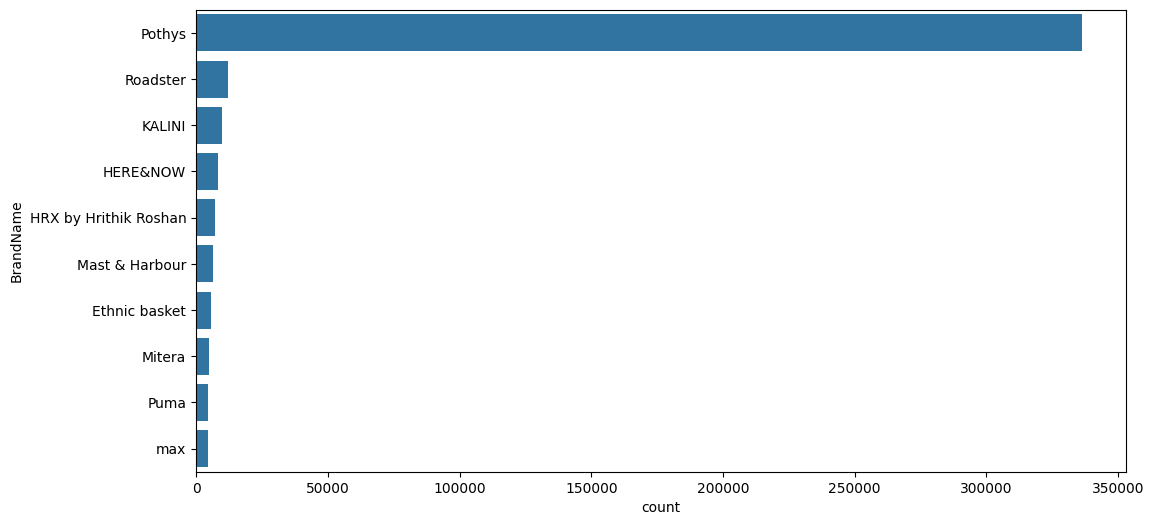

In [55]:
#top 10 brands on based on customer reviews
fig , axs = plt.subplots(1,figsize =  (12,6))
sns.barplot(x = df['Reviews'].value_counts().head(10).values,
            y =  df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

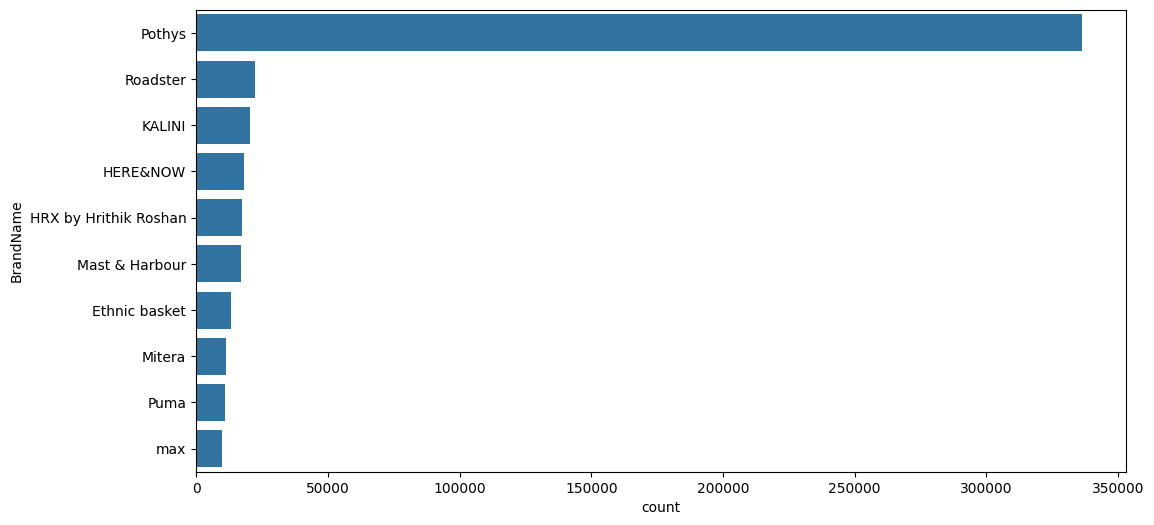

In [56]:
#top 10 brands based on customer ratings
fig , axs = plt.subplots(1,figsize =  (12,6))
sns.barplot(x = df['Ratings'].value_counts().head(10).values,
            y =  df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

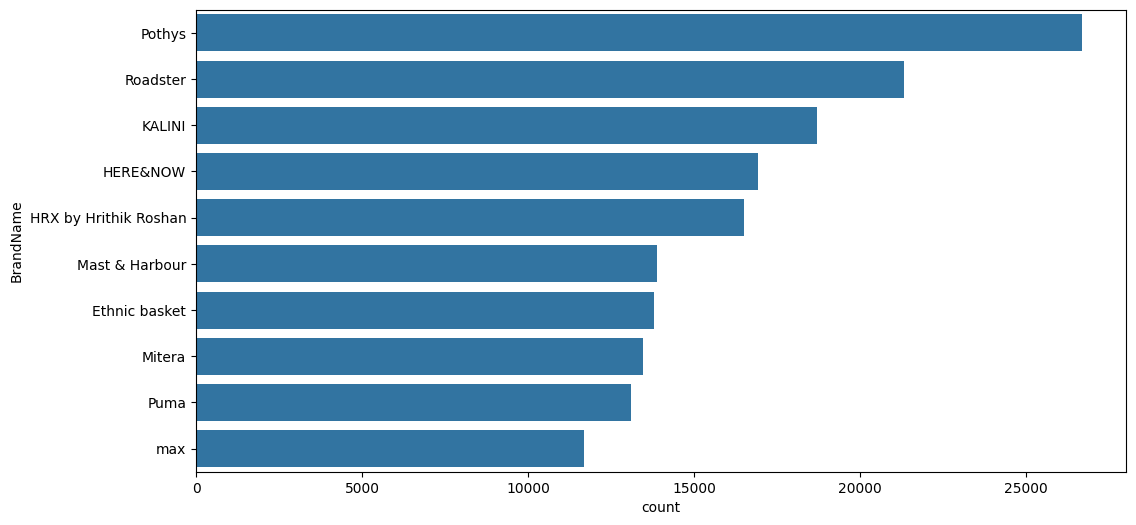

In [57]:
#top 10 based on original price in ruppess
fig , axs = plt.subplots(1,figsize =  (12,6))
sns.barplot(x = df['OriginalPrice (in Rs)'].value_counts().head(10).values,
            y =  df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

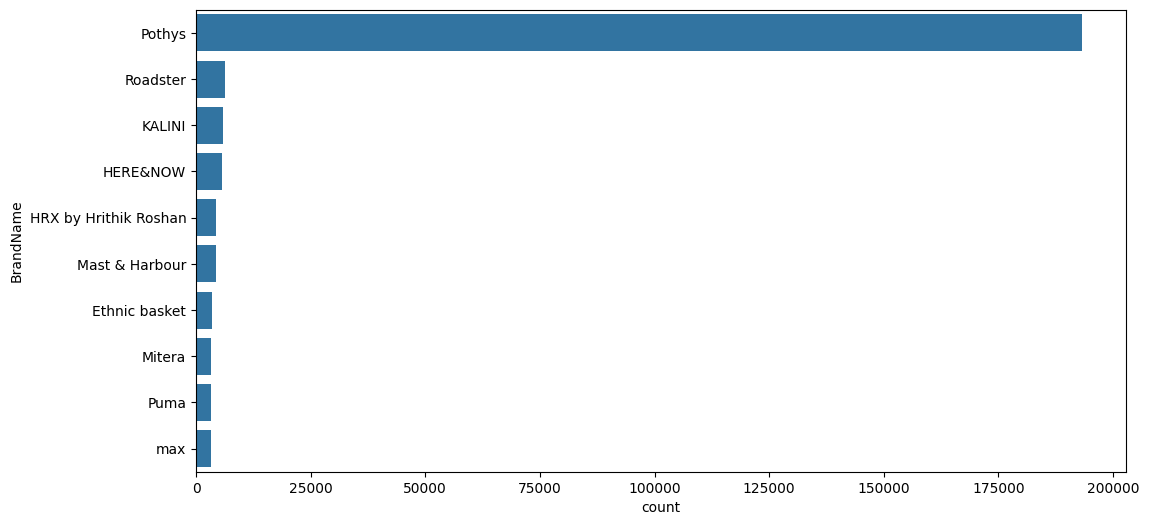

In [58]:
#top 10 products based on Discount Price
fig , axs = plt.subplots(1,figsize =  (12,6))
sns.barplot(x = df['DiscountPrice (in Rs)'].value_counts().head(10).values,
            y =  df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

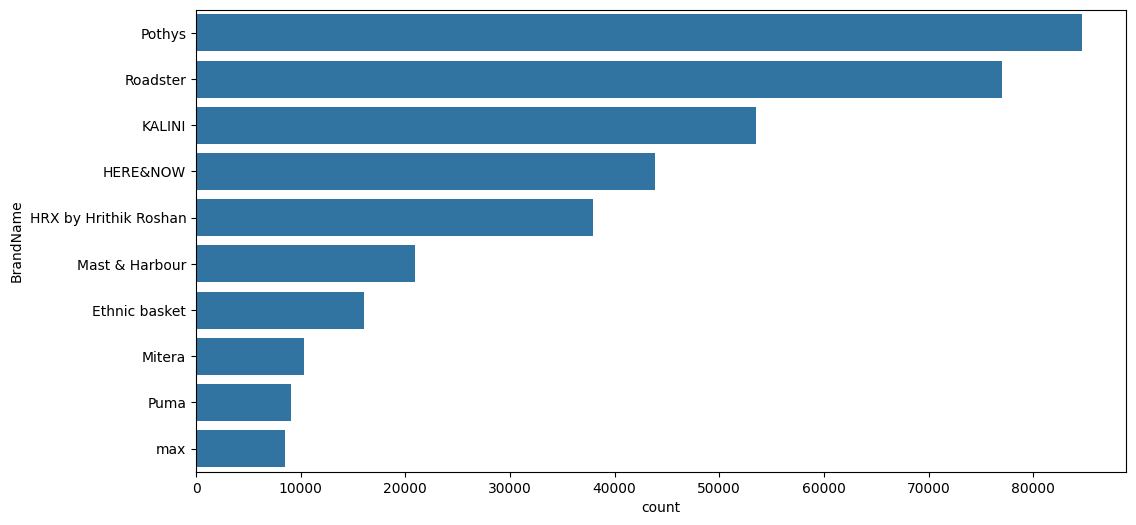

In [59]:
#top 10 products based on size options 
fig , axs = plt.subplots(1,figsize =  (12,6))
sns.barplot(x = df['SizeOption'].value_counts().head(10).values,
            y =  df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show

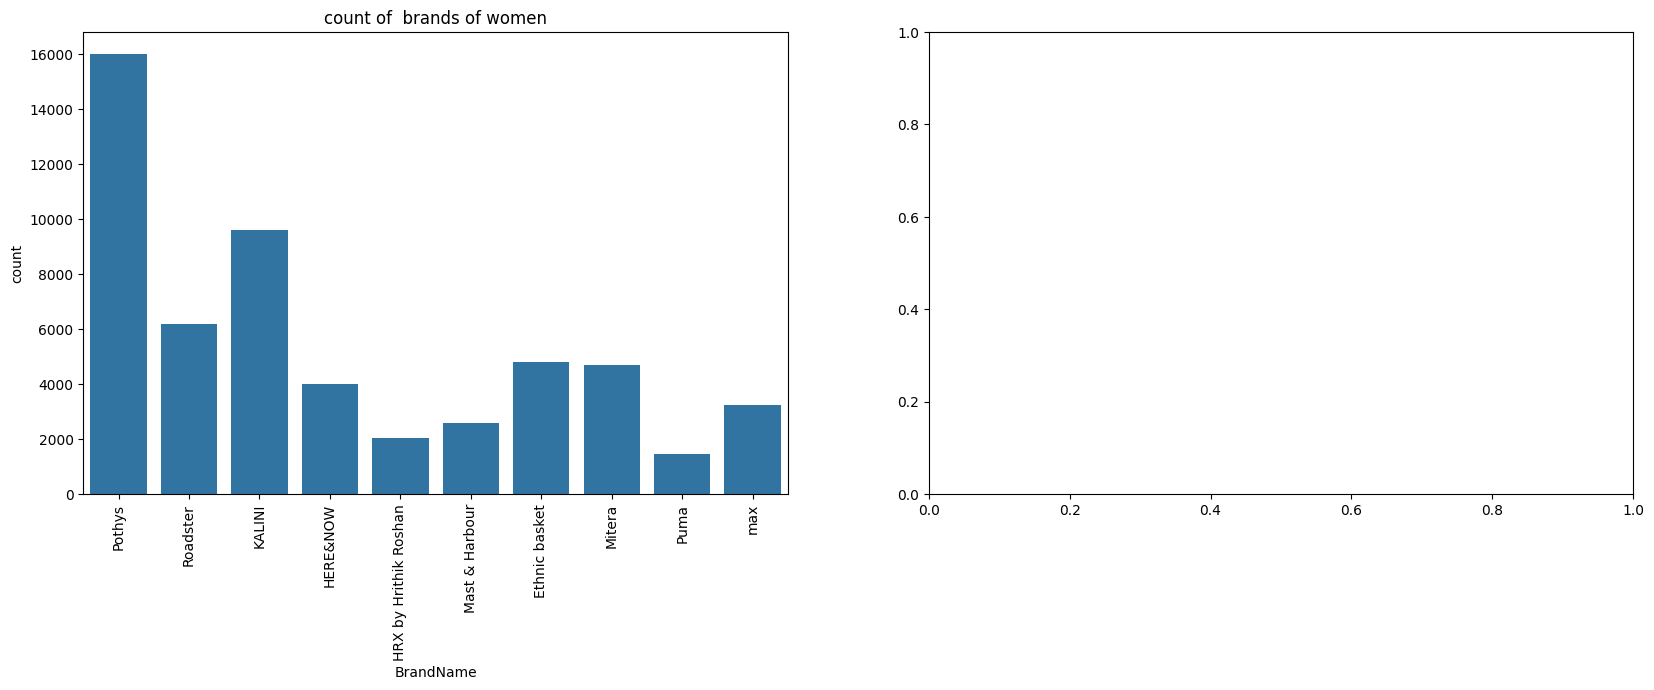

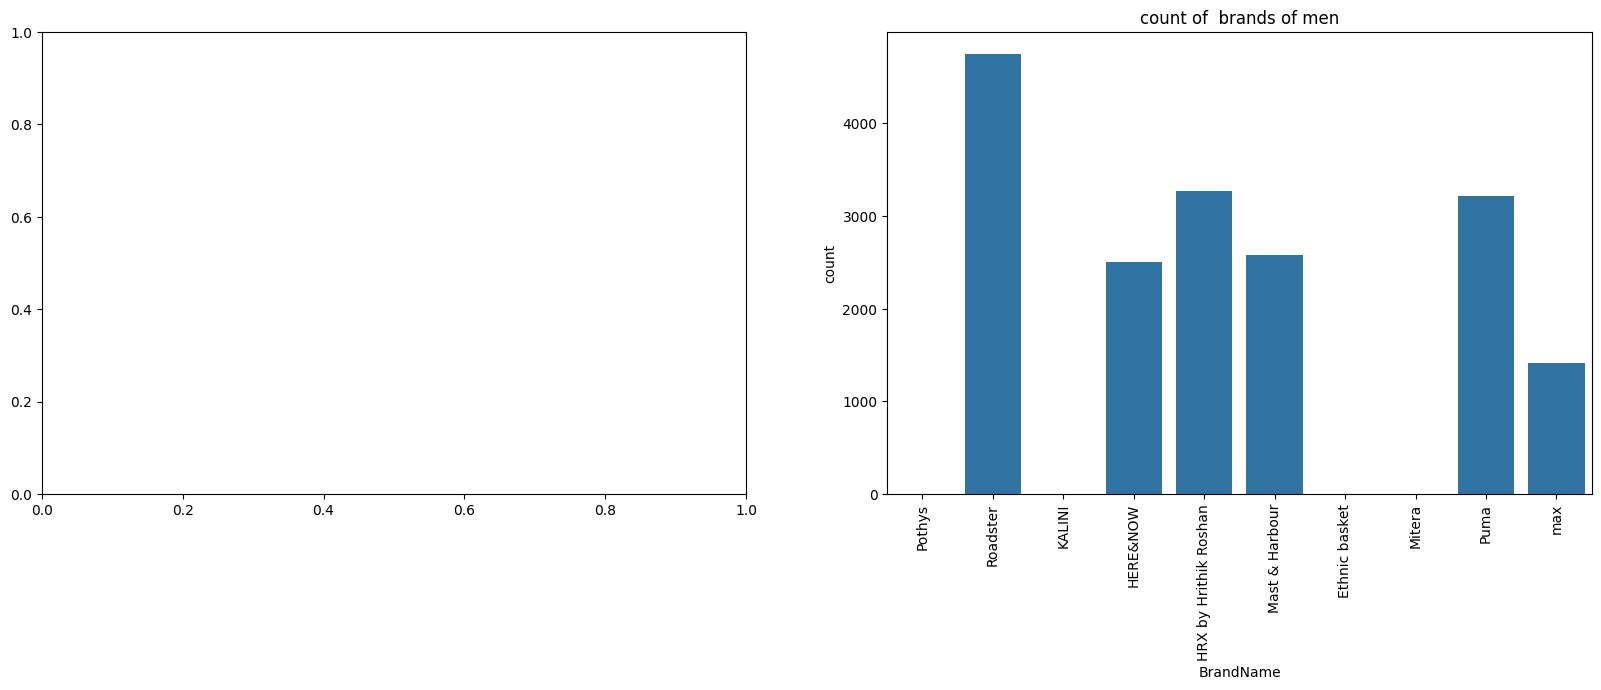

In [60]:
#top 10 based on gendeers

fig, axs = plt.subplots(1 ,2 , figsize = (20,6))
#plot count for brands of women
sns.countplot(data=df[df['category_by_Gender']=='Women'], x = 'BrandName' , ax= axs[0],
              order= df['BrandName'].value_counts().index[:10])
axs[0].set_title("count of  brands of women")
axs[0].tick_params(axis = 'x' , rotation = 90)


#plot count brands for men 
fig, axs = plt.subplots(1,2 , figsize = (20,6))
#plot count for brands of men
sns.countplot(data=df[df['category_by_Gender']=='Men'], x = 'BrandName' , ax= axs[1],
              order= df['BrandName'].value_counts().index[:10])
axs[1].set_title("count of  brands of men")
axs[1].tick_params(axis = 'x' , rotation = 90)


plt.show()

In [61]:
df['Category'].value_counts()

Category
Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

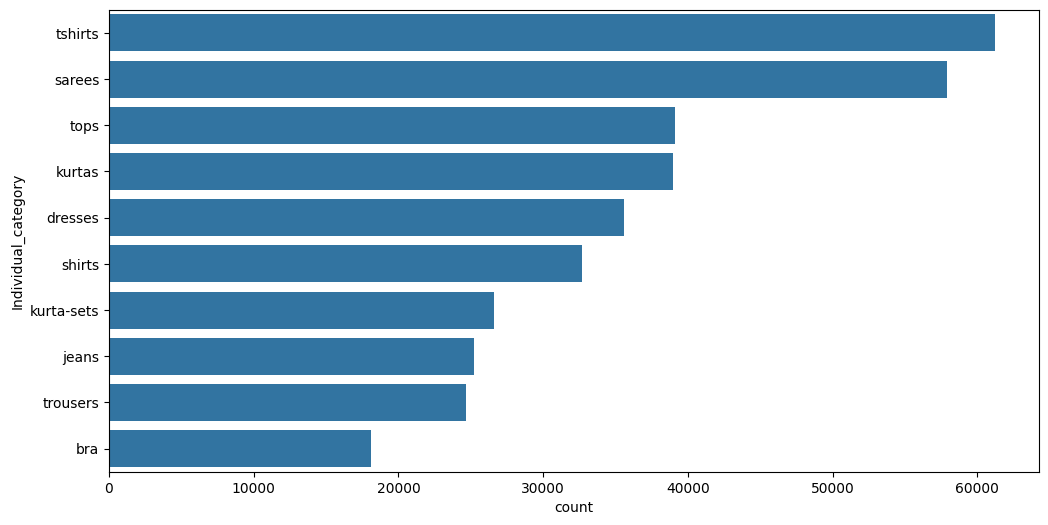

In [62]:
fig , axs = plt.subplots(1,figsize =  (12,6))
sns.barplot(x = df['Individual_category'].value_counts().head(10).values,
            y =  df['Individual_category'].value_counts().head(10).index)
plt.xlabel('count')
plt.show

C:\Users\user\AppData\Local\Temp\ipykernel_11480\1392253902.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_count_sorted , y = top_brands , palette = colors , ax= ax)


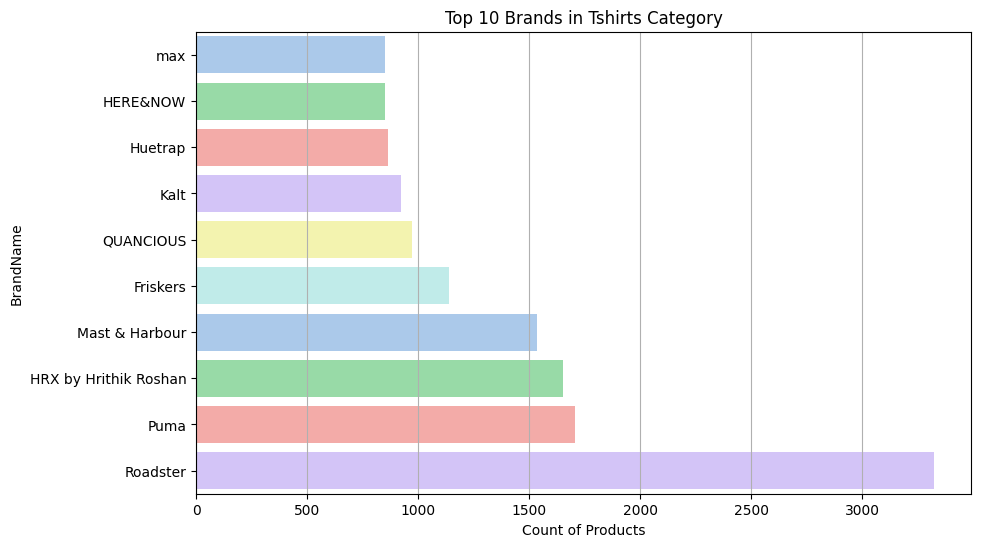

In [63]:
#top tshirt brands 
tshirt = df[df['Individual_category'] == 'tshirts']
brand_count = tshirt['BrandName'].value_counts().head(10)
top_brands = brand_count.index.tolist()[::-1]
brand_count_sorted = brand_count.sort_values()

fig , ax = plt.subplots(figsize = (10,6))
#define a color pallete with different colour for each category 
colors = sns.color_palette('pastel6', len(brand_count_sorted))
sns.barplot(x=brand_count_sorted , y = top_brands , palette = colors , ax= ax)

ax.set_xlabel('Count of Products')
ax.set_ylabel('BrandName')
ax.set_title('Top 10 Brands in Tshirts Category')
plt.grid(axis= 'x')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11480\3186925194.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_count_sorted , y = top_brands , palette = colors , ax= ax)


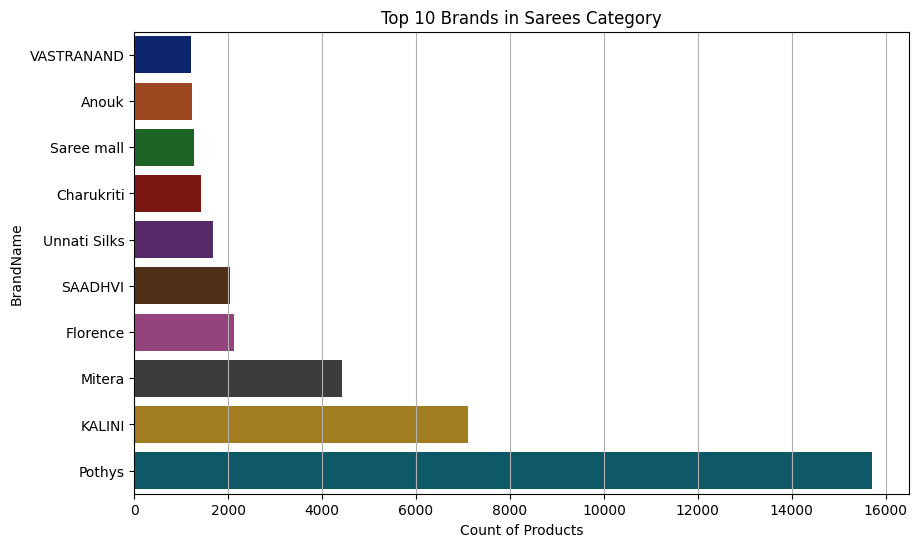

In [64]:
#top  sarees brands 
Sarees = df[df['Individual_category'] == 'sarees']
brand_count = Sarees['BrandName'].value_counts().head(10)
top_brands = brand_count.index.tolist()[::-1]
brand_count_sorted = brand_count.sort_values()

fig , ax = plt.subplots(figsize = (10,6))
#define a color pallete with different colour for each category 
colors = sns.color_palette('dark', len(brand_count_sorted))
sns.barplot(x=brand_count_sorted , y = top_brands , palette = colors , ax= ax)

ax.set_xlabel('Count of Products')
ax.set_ylabel('BrandName')
ax.set_title('Top 10 Brands in Sarees Category')
plt.grid(axis= 'x')
plt.show()

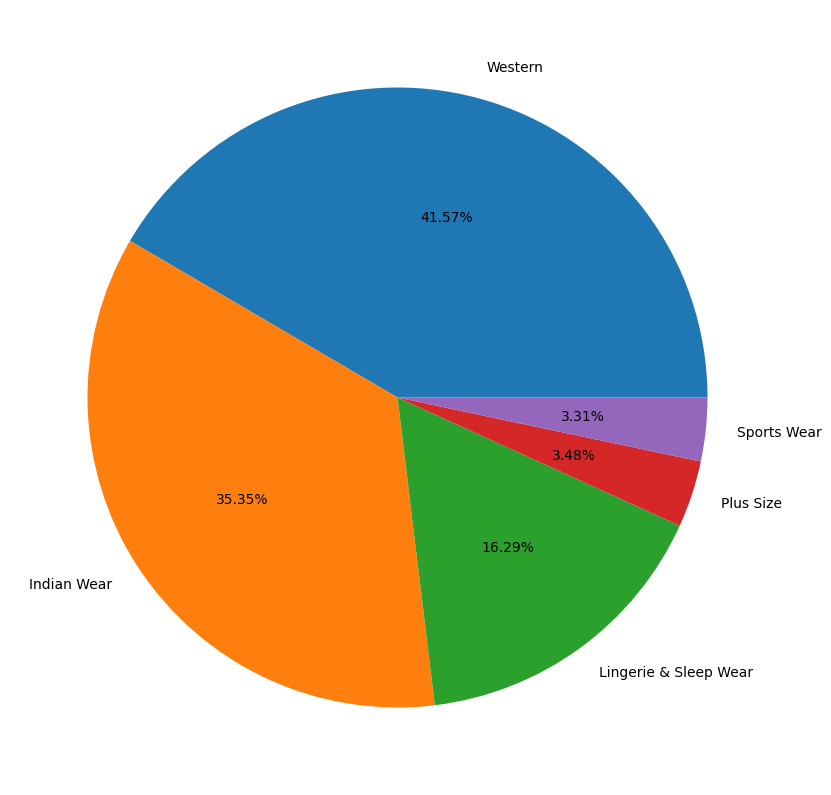

In [66]:
#most selling category in women 
Women = df[df['category_by_Gender']=='Women']
s = Women['Category'].value_counts().values
v = Women['Category'].value_counts().index
fig , axs = plt.subplots(figsize = (10,15))
plt.pie(s[:15], labels=v[:15] , autopct='%1.2f%%')
plt.show()

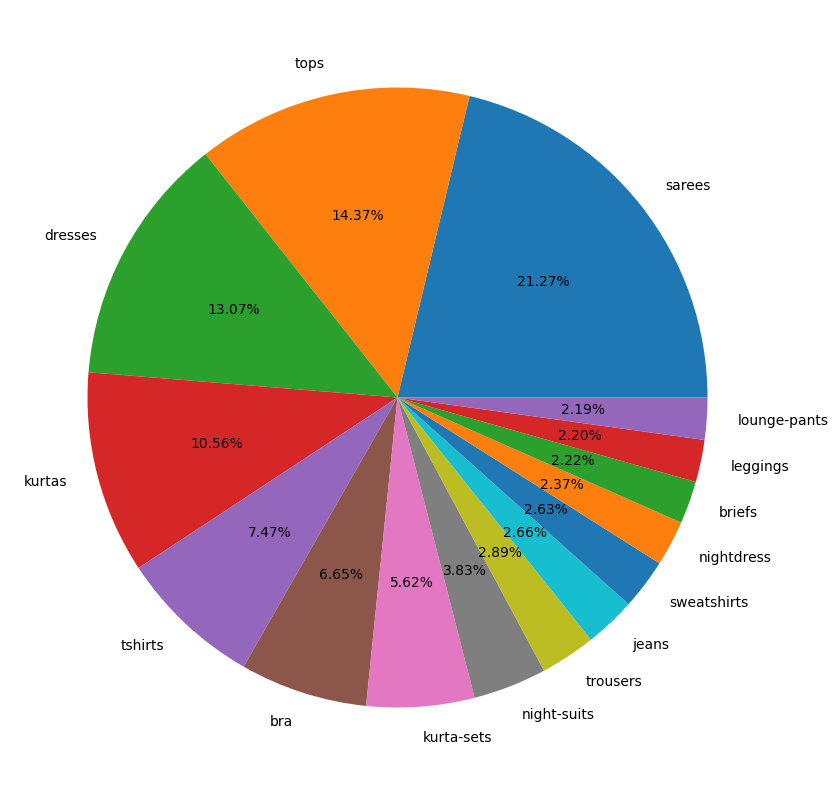

In [67]:
#most selling individual category 
Women = df[df['category_by_Gender']=='Women']
s = Women['Individual_category'].value_counts().values
v = Women['Individual_category'].value_counts().index
fig , axs = plt.subplots(figsize = (10,15))
plt.pie(s[:15], labels=v[:15] , autopct='%1.2f%%')
plt.show()

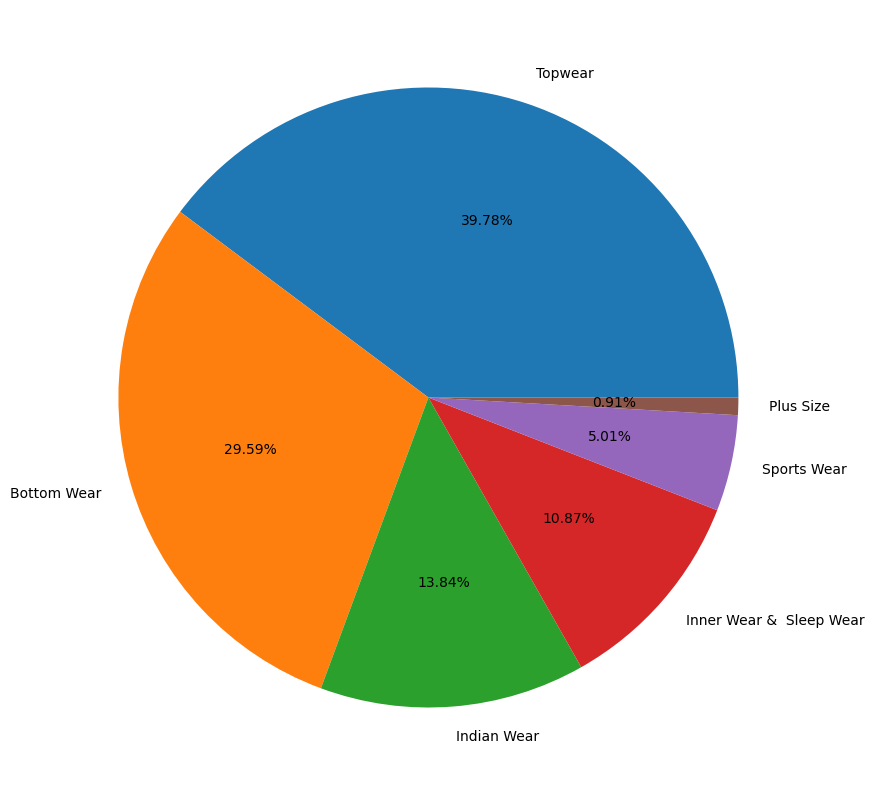

In [68]:
#most selling category in men 
Men = df[df['category_by_Gender']=='Men']
si = Men['Category'].value_counts().values
vi = Men['Category'].value_counts().index
fig , axs = plt.subplots(figsize = (10,15))
plt.pie(si[:15], labels=vi[:15] , autopct='%1.2f%%')
plt.show()

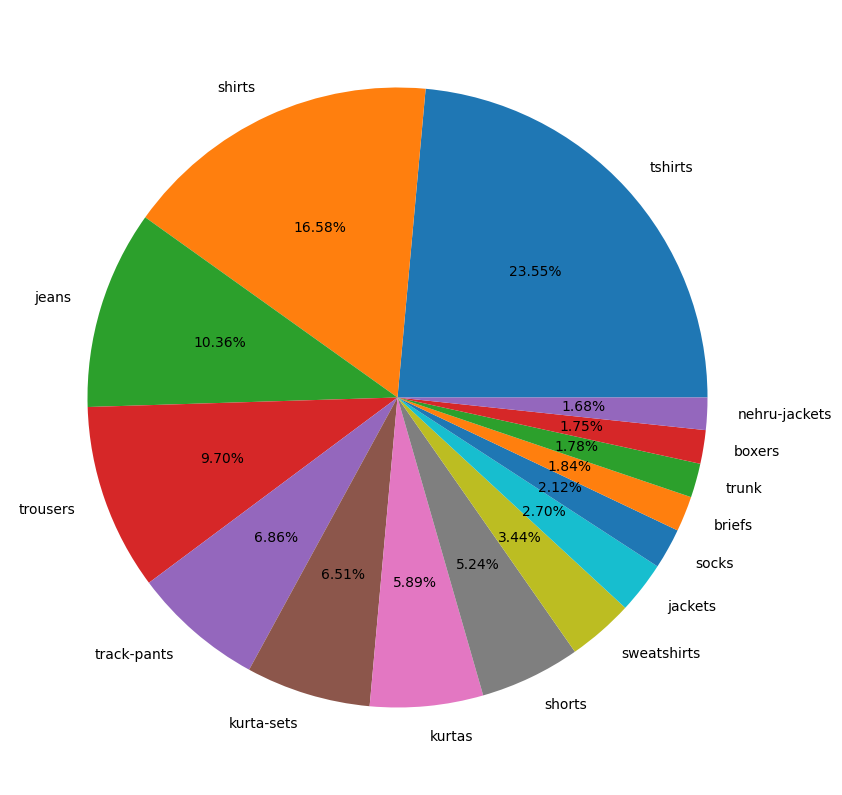

In [69]:
#most selling individual category in men 
Men = df[df['category_by_Gender']=='Men']
si = Men['Individual_category'].value_counts().values
vi = Men['Individual_category'].value_counts().index
fig , axs = plt.subplots(figsize = (10,15))
plt.pie(si[:15], labels=vi[:15] , autopct='%1.2f%%')
plt.show()

In [70]:
df['SizeOption'].value_counts()

SizeOption
S, M, L, XL, XXL          84643
Onesize                   77031
S, M, L, XL               53543
XS, S, M, L, XL           43875
XS, S, M, L, XL, XXL      37899
                          ...  
39, 40, 44, 46, 50            1
L, XL, XXL, M                 1
M, L, XL, 3XL, 4XL            1
32, 34, 40                    1
26, 27, 28, 29, 30, 32        1
Name: count, Length: 3588, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11480\814445932.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = most_popular_men_sizes.values, y = most_popular_men_sizes.index, ax =axs[0], palette="Blues_d")
C:\Users\user\AppData\Local\Temp\ipykernel_11480\814445932.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = most_popular_women_sizes.values, y = most_popular_women_sizes.index, ax =axs[1], palette="Reds_d")


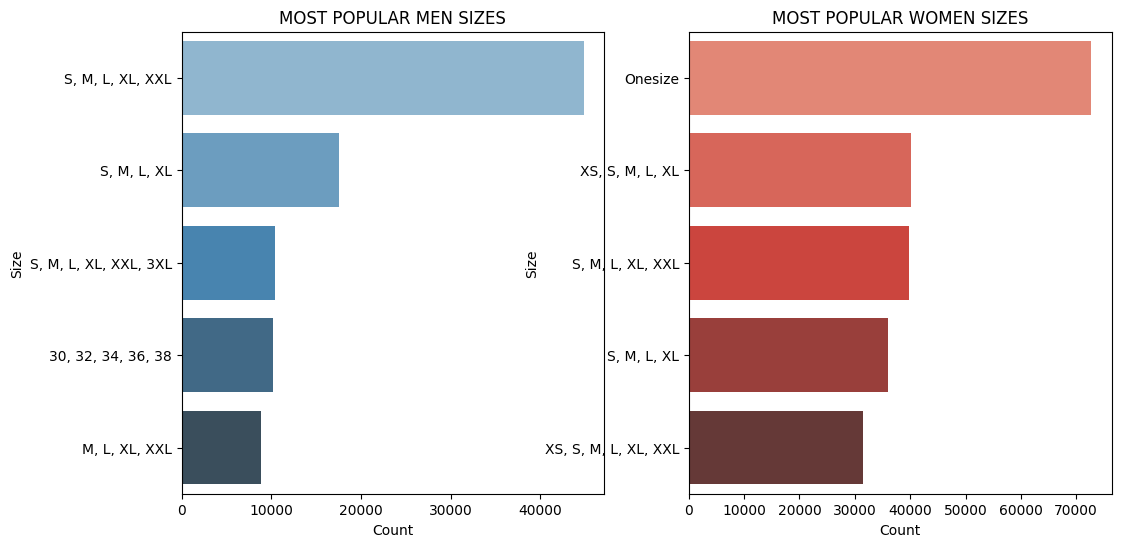

In [71]:
#popular sizes among the men and women 
men_sizes = df[df['category_by_Gender'] == 'Men']['SizeOption']
women_sizes  = df[df['category_by_Gender'] == 'Women']['SizeOption']
#count the occurence of each sizes option for menn and women 
most_popular_men_sizes = men_sizes.value_counts().head(5)
most_popular_women_sizes = women_sizes.value_counts().head(5)

fig, axs = plt.subplots(1,2 , figsize = (12,6))

sns.barplot(x = most_popular_men_sizes.values, y = most_popular_men_sizes.index, ax =axs[0], palette="Blues_d")
axs[0].set_title('MOST POPULAR MEN SIZES')
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Size")

sns.barplot(x = most_popular_women_sizes.values, y = most_popular_women_sizes.index, ax =axs[1], palette="Reds_d")
axs[1].set_title('MOST POPULAR WOMEN SIZES')
axs[1].set_xlabel("Count")
axs[1].set_ylabel("Size")

plt.show()